In [95]:
import pandas as pd
from mplsoccer import VerticalPitch, FontManager, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np

URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [102]:
sb.matches(competition_id=43, season_id=106).sort_values(by='match_date')

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
35,3857286,2022-11-20,18:00:00.000,International - FIFA World Cup,2022,Qatar,Ecuador,0,2,available,available,2022-12-07T12:25:41.064384,2023-01-19T13:41:54.565056,1,Group Stage,Al Bayt Stadium,Daniele Orsato,1.1.0,2,2
57,3857271,2022-11-21,15:00:00.000,International - FIFA World Cup,2022,England,Iran,6,2,available,available,2023-06-07T18:13:08.086293,2023-06-18T15:37:14.539174,1,Group Stage,Sheikh Khalifa International Stadium,Raphael Claus,1.1.0,2,2
46,3857285,2022-11-21,18:00:00.000,International - FIFA World Cup,2022,Senegal,Netherlands,0,2,available,available,2023-06-03T18:25:09.879323,2023-06-20T10:37:16.264240,1,Group Stage,Al Thumama Stadium,Wilton Pereira Sampaio,1.1.0,2,2
34,3857282,2022-11-21,21:00:00.000,International - FIFA World Cup,2022,United States,Wales,1,1,available,available,2023-02-15T14:45:55.987554,2023-04-27T00:56:51.611217,1,Group Stage,Ahmad bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,1.1.0,2,2
63,3857254,2022-11-22,15:00:00.000,International - FIFA World Cup,2022,Denmark,Tunisia,0,0,available,available,2023-03-11T19:37:05.583703,2023-06-18T10:09:31.314061,1,Group Stage,Education City Stadium,César Arturo Ramos Palazuelos,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,available,2023-03-27T04:14:59.777207,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,available,2023-04-19T06:53:52.197711,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,1.1.0,2,2
21,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,available,2023-03-18T06:06:29.317928,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,1.1.0,2,2
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,available,2023-02-20T08:56:30.908564,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,1.1.0,2,2


In [9]:
partido = sb.events(match_id=3869685)

credentials were not supplied. open data access only


In [10]:
partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [12]:
partido.player.value_counts()

Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Montiel    

In [22]:
partido[['x', 'y']] = partido.location.apply(pd.Series)
partido[['end_x', 'end_y']] = partido.pass_end_location.apply(pd.Series)

In [23]:
messi = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini']

In [24]:
messi.type.value_counts()

Ball Receipt*      74
Pass               60
Carry              53
Pressure           17
Ball Recovery       7
Dispossessed        6
Shot                6
Dribble             3
Duel                3
Miscontrol          3
Foul Committed      2
Foul Won            2
Injury Stoppage     1
Offside             1
Clearance           1
Block               1
Player Off          1
Player On           1
Name: type, dtype: int64

In [107]:
pases_messi = messi[messi['type'] == 'Pass']
pases_messi.pass_outcome

36               NaN
39               NaN
52               NaN
62               NaN
103              NaN
110       Incomplete
112              NaN
134              NaN
153              NaN
157       Incomplete
188              NaN
231              NaN
272       Incomplete
281              NaN
295              NaN
297              NaN
299              NaN
344              NaN
365              NaN
378              NaN
410              NaN
469              NaN
493       Incomplete
528              NaN
534              NaN
545              NaN
570       Incomplete
578              NaN
596              NaN
607              NaN
611       Incomplete
654              NaN
695              NaN
717              NaN
721              NaN
770              NaN
786       Incomplete
807              NaN
846              NaN
848              NaN
850              NaN
854              NaN
893              NaN
917       Incomplete
983              NaN
991              NaN
1006      Incomplete
1015         

In [111]:
pases_messi.pass_shot_assist.value_counts()

True    2
Name: pass_shot_assist, dtype: int64

In [122]:
pases_messi_corr = pases_messi[pases_messi.pass_outcome.isna() == True]
pases_messi_err = pases_messi[pases_messi.pass_outcome.isna() != True]
pases_messi_clave = pases_messi[pases_messi.pass_shot_assist.isna() != True]

pases_messi_corr.shape 

(49, 92)

In [123]:
#Metodo McKay Johns.
pases_messi_corr = pases_messi_corr.reset_index(drop=True)
#Distancia al medio del arco del inicio de pase
pases_messi_corr['beginning'] = np.sqrt(np.square(120-pases_messi_corr['x'])+np.square(40-pases_messi_corr['y']))

#Distancia al medio del arco del fin de pase
pases_messi_corr['end'] = np.sqrt(np.square(120-pases_messi_corr['end_x'])+np.square(40-pases_messi_corr['end_y']))

pases_messi_corr['progressive'] = [(pases_messi_corr['end'][x]) / (pases_messi_corr['beginning'][x]) < .8 for x in range(len(pases_messi_corr.beginning))]

#Metodo de GitHub. Calculado por metros y no porcentaje.
pases_messi_corr['delta_goal_dist'] = pases_messi_corr['beginning'] - pases_messi_corr['end']

pases_messi_corr['progressive_2'] = [(pases_messi_corr['delta_goal_dist'][x]) > 11 for x in range(len(pases_messi_corr.delta_goal_dist))]

pases_messi_corr[['beginning', 'end', 'delta_goal_dist']]

,beginning,end,delta_goal_dist
0,43.612498,31.331294,12.281204
1,26.977398,25.277065,1.700333
2,55.456379,73.845040,-18.388661
3,45.763304,56.985349,-11.222045
4,81.204988,54.893078,26.311910
5,36.367568,43.496437,-7.128869
6,40.262762,29.361539,10.901222
7,69.463732,61.798139,7.665592
8,35.999028,19.449422,16.549606
9,39.436658,40.217036,-0.780378


In [60]:
#Si quieren calcular todo en el mismo
pases_messi_corr['delta_goal_dist'] = (np.sqrt((120 - pases_messi_corr['x']) ** 2 + (40 - pases_messi_corr['y']) ** 2) - np.sqrt((120 - pases_messi_corr['end_x']) ** 2 + (40 - pases_messi_corr['end_y']) ** 2))

In [69]:
pases_messi_corr.progressive_2.value_counts()

False    36
True     13
Name: progressive_2, dtype: int64

In [70]:
pases_messi_corr.progressive.value_counts()

False    34
True     15
Name: progressive, dtype: int64

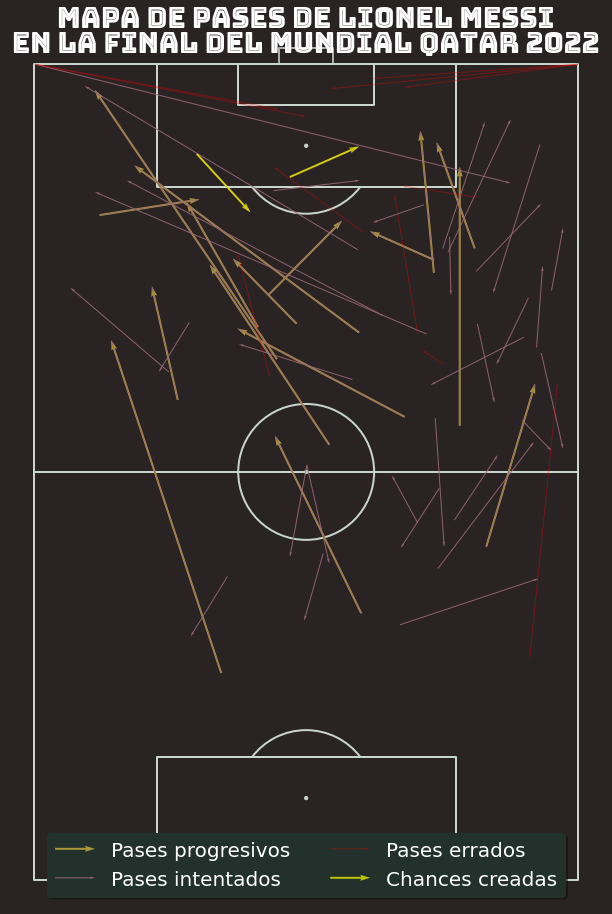

In [131]:
fig, ax = plt.subplots(figsize=(27,16))
facecolor = '#292323'
fig.set_facecolor(facecolor)
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#292323', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
pitch.draw(ax=ax)

progresivos = pases_messi_corr[pases_messi_corr['progressive'] == True]

lc4 = pitch.arrows(progresivos['x'], progresivos['y'],
                  progresivos['end_x'], progresivos['end_y'],
                  width=2, headwidth=3, label='Pases progresivos',
                  color='#ad993c', ax=ax, alpha=.99)
lc1 = pitch.arrows(pases_messi_corr['x'], pases_messi_corr['y'],
                  pases_messi_corr['end_x'], pases_messi_corr['end_y'],
                  width=1, headwidth=2.5, label='Pases intentados', alpha=.9,
                  color='#996776', ax=ax)
lc2 = pitch.arrows(pases_messi_err['x'], pases_messi_err['y'],
                  pases_messi_err['end_x'], pases_messi_err['end_y'],
                  width=1, headwidth=2.5, alpha=.34,
                  color='red', ax=ax, label='Pases errados')
#lc3 = pitch.arrows(asistencias['x'], asistencias['y'],
#                  asistencias['end_x'], asistencias['end_y'],
#                  width=2.3, headwidth=3.3, alpha=.99,
#                  color='yellow', ax=ax, label='Asistencias')
lc = pitch.arrows(pases_messi_clave['x'], pases_messi_clave['y'],
                  pases_messi_clave['end_x'], pases_messi_clave['end_y'],
                  width=2, headwidth=3, alpha=.7,
                  color='yellow', ax=ax, label='Chances creadas')

l = ax.legend(shadow=True, loc='lower center', ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")

plt.title('Mapa de pases de Lionel Messi\nen la Final del Mundial Qatar 2022', color='white',
                  va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

plt.savefig('test.png',dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Mapa de pases de Lionel Messi\nen la Final del Mundial Qatar 2022')

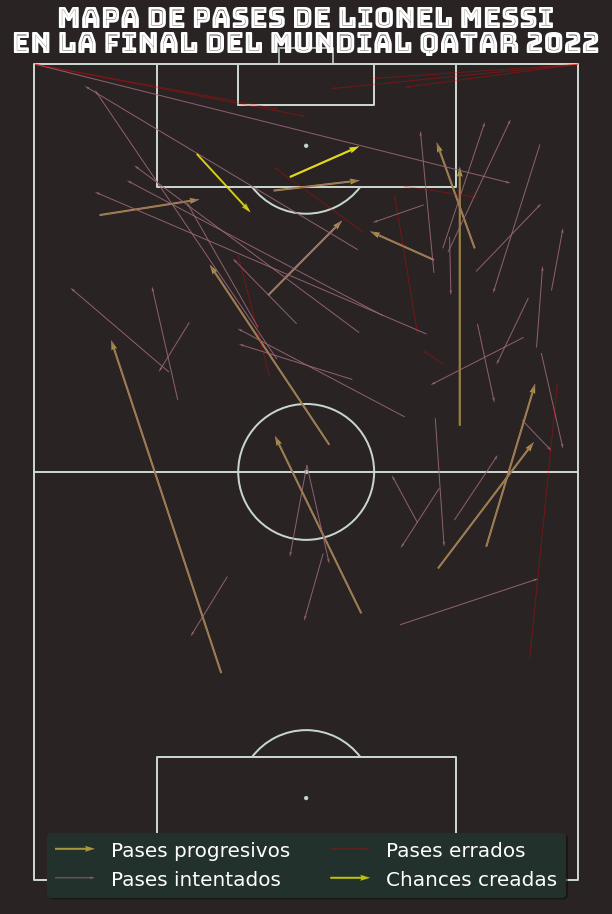

In [101]:
fig, ax = plt.subplots(figsize=(27,16))
facecolor = '#292323'
fig.set_facecolor(facecolor)
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#292323', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
pitch.draw(ax=ax)

#pitch.arrows(pases_messi_corr.x, pases_messi_corr.y, pases_messi_corr.end_x, pases_messi_corr.end_y,ax=ax, width=2, headwidth=3, label='Pases completos', color='#ad993c', alpha=.7)
#pitch.arrows(pases_messi_err.x, pases_messi_err.y, pases_messi_err.end_x, pases_messi_err.end_y,ax=ax, width=2, headwidth=3, label='Pases errados', color='red', alpha=.4)
#pitch.arrows(pases_messi_clave.x, pases_messi_clave.y, pases_messi_clave.end_x, pases_messi_clave.end_y,ax=ax, width=2, headwidth=3, label='Pases clave', color='yellow', alpha=.9)
#pitch.arrows(progresivos.x, progresivos.y, progresivos.end_x, progresivos.end_y,ax=ax, width=2, headwidth=3, label='Pases progresivos', color='blue', alpha=.7)

lc4 = pitch.arrows(progresivos['x'], progresivos['y'],
                  progresivos['end_x'], progresivos['end_y'],
                  width=2, headwidth=3, label='Pases progresivos',
                  color='#ad993c', ax=ax, alpha=.99)
lc1 = pitch.arrows(pases_messi_corr['x'], pases_messi_corr['y'],
                  pases_messi_corr['end_x'], pases_messi_corr['end_y'],
                  width=1, headwidth=2.5, label='Pases intentados', alpha=.9,
                  color='#996776', ax=ax)
lc2 = pitch.arrows(pases_messi_err['x'], pases_messi_err['y'],
                  pases_messi_err['end_x'], pases_messi_err['end_y'],
                  width=1, headwidth=2.5, alpha=.34,
                  color='red', ax=ax, label='Pases errados')
#lc3 = pitch.arrows(asistencias['x'], asistencias['y'],
#                  asistencias['end_x'], asistencias['end_y'],
#                  width=2.3, headwidth=3.3, alpha=.99,
#                  color='yellow', ax=ax, label='Asistencias')
lc = pitch.arrows(pases_messi_clave['x'], pases_messi_clave['y'],
                  pases_messi_clave['end_x'], pases_messi_clave['end_y'],
                  width=2, headwidth=3, alpha=.7,
                  color='yellow', ax=ax, label='Chances creadas')


l = ax.legend(shadow=True, loc='lower center', ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")

plt.title('Mapa de pases de Lionel Messi\nen la Final del Mundial Qatar 2022', color='white',
                  va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

plt.savefig('aguante lanuu.png',dpi=300,bbox_inches='tight')